## Lab 7 Ансамблиевые модели

Построить модель Random Forest и Gradient Boosting на уже знакомом датасете и сделать выводы:

📁 https://disk.yandex.ru/i/2qFbBhSeoiyiow

**О датасете:**

Датасет Pima Indians Diabetes Database используется для предсказания вероятности развития диабета на основе различных факторов. Этот датасет состоит из 8 признаков, которые описывают характеристики пациентов. Вот список этих признаков:

	1.	Pregnancies — количество беременностей.
	2.	Glucose — уровень глюкозы в крови (в молях на децилитр).
	3.	BloodPressure — уровень артериального давления (в мм рт. ст.).
	4.	SkinThickness — толщина кожной складки на трицепсе (в мм).
	5.	Insulin — уровень инсулина в крови (в микед/мл).
	6.	BMI (Body Mass Index) — индекс массы тела (в кг/м²).
	7.	DiabetesPedigreeFunction — функция предрасположенности к диабету, основанная на семейной истории.
	8.	Age — возраст пациента (в годах).

🎯 Целевая переменная:

	•	Outcome — наличие или отсутствие диабета (1 — диабет, 0 — нет диабета).

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier


In [5]:
df = pd.read_csv('./data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df['Glucose'][df['Glucose'] == 0] = np.median(df['Glucose'])
df['BloodPressure'][df['BloodPressure'] == 0] = np.median(df['BloodPressure'])
df['SkinThickness'][df['SkinThickness'] == 0] = np.median(df['SkinThickness'])
df['Insulin'][df['Insulin'] == 0] = np.median(df['Insulin'])

/var/folders/7k/0hthbbf925j5rmfcysr3jss40000gn/T/ipykernel_52174/3889533501.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Glucose'][df['Glucose'] == 0] = np.median(df['Glucose'])
/var/folders/7k/0hthbbf925j5rmfcysr3jss40000gn/T/ipy

In [7]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [ ]:
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=4,
    max_features= 4,
    bootstrap=True,
    min_samples_split= 2,
    min_samples_leaf= 1 ,
    random_state=42,
    class_weight=None,
    verbose=1,
    n_jobs=-1
)
# 'max_depth': 4, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 2

In [31]:
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Par

In [32]:
print(f'rf train accuracy {accuracy_score(y_train, y_pred_train):.3f}')
print(f'fr test accuracy {accuracy_score(y_test, y_pred_test):.3f}')

rf train accuracy 0.827
fr test accuracy 0.740


In [33]:
cv_scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | el

[CV] END .................................................... total time=   1.8s
[CV] END .................................................... total time=   1.8s
[CV] END .................................................... total time=   1.8s
[CV] END .................................................... total time=   1.9s
[CV] END .................................................... total time=   1.9s
[CV] END .................................................... total time=   1.9s


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    2.0s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | e

[CV] END .................................................... total time=   2.0s
[CV] END .................................................... total time=   2.1s


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.3s


[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.9s


[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs

In [34]:
cv_scores

array([0.76623377, 0.77922078, 0.74025974, 0.64935065, 0.71428571,
       0.80519481, 0.77922078, 0.81818182, 0.72368421, 0.80263158])

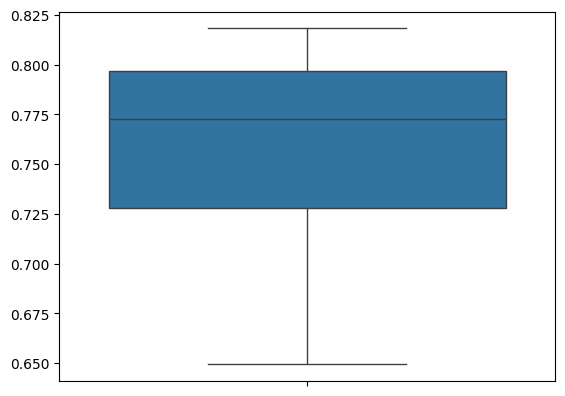

In [35]:
sns.boxplot(cv_scores)
plt.show()

# Подбор 

In [39]:
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [2, 3, 4]
}

rf_s = RandomForestClassifier(n_estimators=500, random_state=42)

grid_search = GridSearchCV(estimator=rf_s,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

In [40]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=500,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [42]:
print(grid_search.best_params_)

{'max_depth': 4, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [43]:
print(grid_search.best_score_)

0.7753298680527789
